In [1]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
positive = [ (1.56, 1.55), (0.88, 1.95), (0.25, 1.07), (2.28, 0.76),  (2.89, 1.61),  (2.84, 0.36), (0.51, 2.78), (0.05, 1.60),
 (2.65, 2.43), (2.82, 1.77) ]

In [3]:
negative = [ (3.75 , 9.51),  (7.32 , 5.99),  (0.58 , 8.66),
    (6.01 , 7.08),  (0.21 , 9.70),  (8.32 , 2.12),  (3.04 , 5.25),
    (4.32 , 2.91),  (6.12 , 1.39),  (2.92 , 3.66),  (4.56 , 7.85),
    (2.00 , 5.14),  (5.92 , 0.46),  (6.08 , 1.71),  (0.65 , 9.49),
    (9.66 , 8.08),  (3.05 , 0.98),  (6.84 , 4.40),  (1.22 , 4.95), (0.34 , 9.09) ]

In [4]:
answers = [1 for _ in positive] + [0 for _ in negative]
len(positive), len(negative), len(answers)

(10, 20, 30)

# Question 1

In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(np.array(positive+negative), np.array(answers))
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

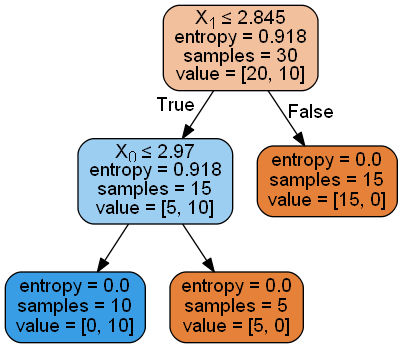

In [6]:
Image(graph.create_png())

# Question 2

In [7]:
clf2 = tree.DecisionTreeClassifier(criterion='gini').fit(np.array(positive+negative), np.array(answers))
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())

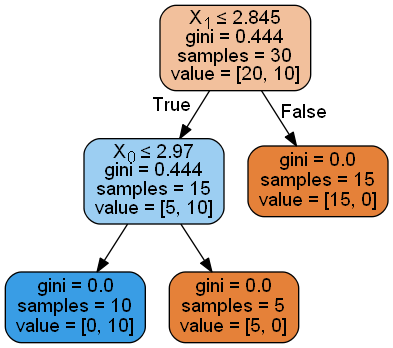

In [8]:
Image(graph2.create_png())

# Question 3

In [9]:
TP = sum((xy[0] < 2) == answers[i] for i, xy in enumerate(positive))
TP

5

# Question 4

In [10]:
FN = sum((xy[0] < 2) != answers[i] for i, xy in enumerate(positive))
FN

5

# Question 5

In [11]:
FP = sum((xy[0] < 2) == 1 for i, xy in enumerate(negative))
FP

5

# Question 6

In [12]:
TN = sum((xy[0] < 2) == 0 for i, xy in enumerate(negative))
TN

15

# Question 7

In [13]:
recall = float(TP) / float((TP+FN))
recall

0.5

# Question 8

In [14]:
precision = float(TP) / float((TP+FP))
precision

0.5

In [15]:
from math import log
def log2(x):
    return log(x, 2)
probP = float(len(positive)) / float(len(positive+negative))
probN = 1 - probP

In [16]:
probP

0.3333333333333333

In [17]:
probN

0.6666666666666667

In [18]:
def entropy(P, N):
    return -P * log2(P) - (N) * log2(N)
prev_ent = entropy(probP, probN)
prev_ent

0.9182958340544896

In [19]:
def gini(P, N):
    return 2 * P * N
prev_gini = gini(probP, probN)
prev_gini

0.4444444444444445

In [20]:
split1 = [(x, y) for x, y in positive+negative if x < 2]
split2 = [(x, y) for x, y in positive+negative if x >= 2]

In [21]:
probP1 = float(len([xy for xy in split1 if xy in positive])) / len(split1)
probP1

0.5

In [22]:
probP2 = float(len([xy for xy in split2 if xy in positive])) / len(split2)
probP2

0.25

In [23]:
entropy(probP1, 1-probP1) - prev_ent

0.08170416594551044

In [24]:
entropy(probP2, 1-probP2) - prev_ent

-0.10701770959535672

In [25]:
w0, w1, w2 = (1.99, -1, 0)
def h(x, y):
    return w0 + w1*x + w2*y

In [26]:
hTP = sum(h(x, y) > 0 for x, y in positive)
hTP

5

In [27]:
hFP = sum(h(x, y) > 0 for x, y in negative)
hFP

5

In [28]:
hprecision = float(hTP) / float(hTP+hFP)
hprecision

0.5

In [29]:
hFN = sum(h(x, y) < 0 for x, y in positive)
hFN

5

In [30]:
hTN = sum(h(x, y) < 0 for x, y in negative)
hTN

15

In [31]:
haccuracy = 1 - (float(hFN+hFP) / float(hFN+hFP+hTP+hTN))
haccuracy

0.6666666666666667

In [32]:
w0_2 = 2.00
def h_2(x, y):
    return w0_2 + w1*x + w2*y

In [33]:
new_pos = (2.00, 2.00)

In [34]:
new_pos

(2.0, 2.0)

In [35]:
h_2(new_pos[0], new_pos[1])

0.0

In [36]:
(0.0 - 2.0) * 2.0

-4.0

In [39]:
prev_gini - gini(probP1, 1-probP1)

-0.055555555555555525

In [41]:
prev_ent - entropy(probP1, 1-probP1)

-0.08170416594551044